In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings; warnings.filterwarnings('ignore')

In [2]:
#Loading dataset
booking = pd.read_csv('wine-quality-white-and-red.csv')
df = booking[["fixed acidity", "volatile acidity", "citric acid","residual sugar","chlorides","free sulfur dioxide",
          "total sulfur dioxide","density","pH","sulphates","alcohol","type"]]

In [3]:
df['type'] = LabelEncoder().fit_transform(df['type'])
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [4]:
#Dataset info
df.shape

(6497, 12)

In [5]:
df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,1.000000


In [6]:
#Extracting and analysing through isolation forest
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.1, random_state=42)
df['is_inlier_IF'] = iso_forest.fit_predict(df)

In [7]:
inliers_IF = df[df['is_inlier_IF'] == 1]
outliers_IF = df[df['is_inlier_IF'] == -1]

In [8]:
outliers_IF

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,is_inlier_IF
14,8.3,0.420,0.62,19.25,0.040,41.0,172.0,1.00020,2.98,0.67,9.7,1,-1
17,6.2,0.660,0.48,1.20,0.029,29.0,75.0,0.98920,3.33,0.39,12.8,1,-1
20,6.2,0.660,0.48,1.20,0.029,29.0,75.0,0.98920,3.33,0.39,12.8,1,-1
41,6.7,0.240,0.39,2.90,0.173,63.0,157.0,0.99370,3.10,0.34,9.4,1,-1
98,9.8,0.360,0.46,10.50,0.038,4.0,83.0,0.99560,2.89,0.30,10.1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6472,5.6,0.310,0.78,13.90,0.074,23.0,92.0,0.99677,3.39,0.48,10.5,0,-1
6475,6.2,0.700,0.15,5.10,0.076,13.0,27.0,0.99622,3.54,0.60,11.9,0,-1
6480,6.1,0.715,0.10,2.60,0.053,13.0,27.0,0.99362,3.57,0.50,11.9,0,-1
6486,7.2,0.660,0.33,2.50,0.068,34.0,102.0,0.99414,3.27,0.78,12.8,0,-1


In [9]:
inliers_IF

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,is_inlier_IF
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,1,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,1,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,1,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0,1
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0,1
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0,1
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0,1


In [10]:
def is_inlier(row):
    # Fixed Acidity constraint: 3.5 < Fixed Acidity < 16
    if row['fixed acidity'] < 3.5 or row['fixed acidity'] > 16:
            return -1
    
    # Volatile Acidity constraint: 0.05 < Volatile Acidity < 1.6
    if row['volatile acidity'] < 0.05 or row['volatile acidity'] > 1.6:
            return -1
        
    # Citric Acid constraint: 0.0 < Citric Acid < 1.7
    if row['citric acid'] < 0 or row['citric acid'] > 1.7:
            return -1
        
    # Residual Sugar constraint: 0.5 < Residual Sugar < 70
    if row['residual sugar'] < 0.5 or row['residual sugar'] > 70:
            return -1
        
    # Chlorides constraint: 0.0 < Chlorides < 0.65
    if row['chlorides'] < 0 or row['chlorides'] > 0.65:
            return -1
        
    # Free Sulfur Dioxide constraint: 0.5 < Free Sulfur Dioxide < 300
    if row['free sulfur dioxide'] < 0.5 or row['free sulfur dioxide'] > 300:
            return -1
    
    # Total Sulfur Dioxide constraint: 5 < Total Sulfur Dioxide < 450
    if row['total sulfur dioxide'] < 5 or row['total sulfur dioxide'] > 450:
            return -1
    
    # Density constraint: 0.98 < Density < 1.05
    if row['density'] < 0.98 or row['density'] > 1.05:
            return -1
    
    # pH constraint: 2.7 < pH < 4.1
    if row['pH'] < 2.7 or row['pH'] > 4.1:
            return -1
    
    # Sulphates constraint: 0.1 < Sulphates < 2.1
    if row['sulphates'] < 0.1 or row['sulphates'] > 2.1:
            return -1
    
    # Alcohol constraint: 7% < Alcohol < 15%
    if row['alcohol'] < 7 or row['alcohol'] > 15:
            return -1
    
    # If all constraints are satisfied, return 1
    return 1

In [11]:
#Extracting and analysing through human-written constraints
df['is_inlier_HW'] = df.apply(is_inlier, axis=1)

In [12]:
inliers_HW = df[df['is_inlier_HW'] == 1]
outliers_HW = df[df['is_inlier_HW'] == -1]
outliers_HW

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,is_inlier_IF,is_inlier_HW


In [13]:
#disagreements between two methods
df['similar'] = abs(df['is_inlier_IF'] + df['is_inlier_HW']) / 2

In [14]:
mismatch = df[df['similar'] == 0]
similar = df[df['similar'] == 1]

In [15]:
#writing the disagreed datapoints into csv
mismatch.to_csv("disagreement.csv")

In [16]:
# Calculate the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

conf_matrix = confusion_matrix(df['is_inlier_HW'], df['is_inlier_IF'])
conf_matrix

array([[   0,    0],
       [ 650, 5847]])

Text(95.72222222222221, 0.5, 'Handwritten')

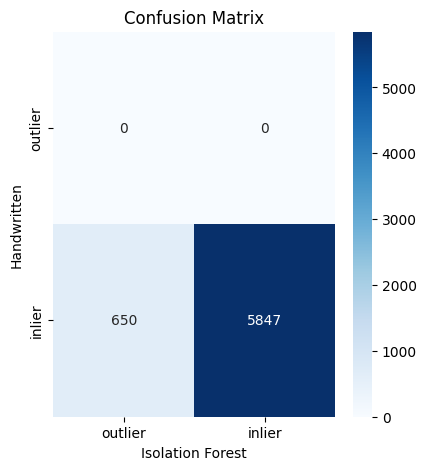

In [17]:
# Plot confusion matrix
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["outlier","inlier"], yticklabels=["outlier","inlier"])
plt.title("Confusion Matrix")
plt.xlabel("Isolation Forest")
plt.ylabel("Handwritten")

In [18]:
#Both agree it is inlier
all_inlier = df[(df['is_inlier_IF'] == 1) & (df['is_inlier_HW'] == 1)] 
all_inlier.to_csv("all_inlier.csv")

In [19]:
#Both agree it is outlier
all_outlier = df[(df['is_inlier_IF'] == -1) & (df['is_inlier_HW'] == -1)] 
all_outlier.to_csv("all_outlier.csv")